<img src="../Pierian-Data-Logo.PNG">
<br>
<strong><center>Copyright 2019. Created by Jose Marcial Portilla.</center></strong>

# Neural Network Exercises
For these exercises we'll perform a binary classification on the Census Income dataset available from the <a href = 'http://archive.ics.uci.edu/ml/datasets/Adult'>UC Irvine Machine Learning Repository</a><br>
The goal is to determine if an individual earns more than $50K based on a set of continuous and categorical variables.

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

## Census Income Dataset
For this exercises we're using the Census Income dataset available from the <a href='http://archive.ics.uci.edu/ml/datasets/Adult'>UC Irvine Machine Learning Repository</a>.

The full dataset has 48,842 entries. For this exercise we have reduced the number of records, fields and field entries, and have removed entries with null values. The file <strong>income.csv</strong> has	30,000 entries

Each entry contains the following information about an individual:
* <strong>age</strong>: the age of an individual as an integer from 18 to 90 (continuous)
* <strong>sex</strong>: Male or Female (categorical)
* <strong>education</strong>: represents the highest level of education achieved by an individual (categorical)
* <strong>education_num</strong>: represents education as an integer from 3 to 16 (categorical)
<div><table style="display: inline-block">
<tr><td>3</td><td>5th-6th</td><td>8</td><td>12th</td><td>13</td><td>Bachelors</td></tr>
<tr><td>4</td><td>7th-8th</td><td>9</td><td>HS-grad</td><td>14</td><td>Masters</td></tr>
<tr><td>5</td><td>9th</td><td>10</td><td>Some-college</td><td>15</td><td>Prof-school</td></tr>
<tr><td>6</td><td>10th</td><td>11</td><td>Assoc-voc</td><td>16</td><td>Doctorate</td></tr>
<tr><td>7</td><td>11th</td><td>12</td><td>Assoc-acdm</td></tr>
</table></div>
* <strong>marital-status</strong>: marital status of an individual (categorical)
<div><table style="display: inline-block">
<tr><td>Married</td><td>Divorced</td><td>Married-spouse-absent</td></tr>
<tr><td>Separated</td><td>Widowed</td><td>Never-married</td></tr>
</table></div>
* <strong>workclass</strong>: a general term to represent the employment status of an individual (categorical)
<div><table style="display: inline-block">
<tr><td>Local-gov</td><td>Private</td></tr>
<tr><td>State-gov</td><td>Self-emp</td></tr>
<tr><td>Federal-gov</td></tr>
</table></div>
* <strong>occupation</strong>: the general type of occupation of an individual (categorical)
<div><table style="display: inline-block">
<tr><td>Adm-clerical</td><td>Handlers-cleaners</td><td>Protective-serv</td></tr>
<tr><td>Craft-repair</td><td>Machine-op-inspct</td><td>Sales</td></tr>
<tr><td>Exec-managerial</td><td>Other-service</td><td>Tech-support</td></tr>
<tr><td>Farming-fishing</td><td>Prof-specialty</td><td>Transport-moving</td></tr>
</table></div>
* <strong>hours-per-week</strong>: the hours an individual has reported to work per week as an integer from 20 to 90 (continuous)
* <strong>income</strong>: whether or not an individual makes more than \\$50,000 annually (label)
* <strong>label</strong>: income represented as an integer (0: <=\\$50K, 1: >\\$50K) (optional label)

## Perform standard imports
Run the cell below to load the libraries needed for this exercise and the Census Income dataset.

In [18]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline

df = pd.read_csv('../Data/income.csv')

In [19]:
print(len(df))
df.head()

30000


,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,27,Male,HS-grad,9,Never-married,Private,Craft-repair,40,<=50K,0
1,47,Male,Masters,14,Married,Local-gov,Exec-managerial,50,>50K,1
2,59,Male,HS-grad,9,Divorced,Self-emp,Prof-specialty,20,<=50K,0
3,38,Female,Prof-school,15,Never-married,Federal-gov,Prof-specialty,57,>50K,1
4,64,Female,11th,7,Widowed,Private,Farming-fishing,40,<=50K,0


In [20]:
df['label'].value_counts()

label
0    21700
1     8300
Name: count, dtype: int64

### 1. Separate continuous, categorical and label column names
You should find that there are 5 categorical columns, 2 continuous columns and 1 label.<br>
In the case of <em>education</em> and <em>education-num</em> it doesn't matter which column you use. For the label column, be sure to use <em>label</em> and not <em>income</em>.<br>
Assign the variable names "cat_cols", "cont_cols" and "y_col" to the lists of names.

In [21]:
df.columns

Index(['age', 'sex', 'education', 'education-num', 'marital-status',
       'workclass', 'occupation', 'hours-per-week', 'income', 'label'],
      dtype='object')

In [37]:
cat_cols = ['sex', 'education', 'marital-status', 'workclass', 'occupation']
cont_cols = ['age', 'hours-per-week']
y_col = ['label']






# RUN THIS CODE TO COMPARE RESULTS:
print(f'cat_cols  has {len(cat_cols)} columns')
print(f'cont_cols has {len(cont_cols)} columns')
print(f'y_col     has {len(y_col)} column')

cat_cols  has 5 columns
cont_cols has 2 columns
y_col     has 1 column


In [4]:
# DON'T WRITE HERE

cat_cols  has 5 columns
cont_cols has 2 columns
y_col     has 1 column


### 2. Convert categorical columns to category dtypes

In [38]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')







In [5]:
# DON'T WRITE HERE

### Optional: Shuffle the dataset
The <strong>income.csv</strong> dataset is already shuffled. However, if you would like to try different configurations after completing the exercises, this is where you would want to shuffle the entire set.

In [16]:
# THIS CELL IS OPTIONAL
df = shuffle(df, random_state=101)
df.reset_index(drop=True, inplace=True)
df.head()

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,30,Male,Some-college,10,Married,Private,Transport-moving,80,>50K,1
1,69,Male,Masters,14,Married,Private,Prof-specialty,25,<=50K,0
2,49,Male,HS-grad,9,Married,Private,Transport-moving,48,>50K,1
3,43,Male,Some-college,10,Married,Private,Machine-op-inspct,40,<=50K,0
4,42,Male,HS-grad,9,Married,Private,Exec-managerial,50,>50K,1


### 3. Set the embedding sizes
Create a variable "cat_szs" to hold the number of categories in each variable.<br>
Then create a variable "emb_szs" to hold the list of (category size, embedding size) tuples.

In [39]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50,(size+1)//2)) for size in cat_szs]
emb_szs




[(2, 1), (14, 7), (6, 3), (5, 3), (12, 6)]

In [6]:
# DON'T WRITE HERE

[(2, 1), (14, 7), (6, 3), (5, 3), (12, 6)]

### 4. Create an array of categorical values
Create a NumPy array called "cats" that contains a stack of each categorical column <tt>.cat.codes.values</tt><br>
Note: your output may contain different values. Ours came after performing the shuffle step shown above.

In [40]:
sx = df['sex'].cat.codes.values
ed = df['education'].cat.codes.values
ms = df['marital-status'].cat.codes.values
wc = df['workclass'].cat.codes.values
oc = df['occupation'].cat.codes.values
cats = np.stack([sx, ed, ms, wc, oc], axis=1)




# RUN THIS CODE TO COMPARE RESULTS
cats[:5]

array([[ 1, 10,  3,  2,  1],
       [ 1, 11,  1,  1,  2],
       [ 1, 10,  0,  3,  7],
       [ 0, 12,  3,  0,  7],
       [ 0,  1,  5,  2,  3]], dtype=int8)

In [7]:
# DON'T WRITE HERE

array([[ 1, 10,  3,  2,  1],
       [ 1, 11,  1,  1,  2],
       [ 1, 10,  0,  3,  7],
       [ 0, 12,  3,  0,  7],
       [ 0,  1,  5,  2,  3]], dtype=int8)

### 5. Convert "cats" to a tensor
Convert the "cats" NumPy array to a tensor of dtype <tt>int64</tt>

In [41]:
cats = torch.tensor(cats, dtype=torch.int64)

In [8]:
# DON'T WRITE HERE

### 6. Create an array of continuous values
Create a NumPy array called "conts" that contains a stack of each continuous column.<br>
Note: your output may contain different values. Ours came after performing the shuffle step shown above.

In [42]:
conts = np.stack([df[col].values for col in cont_cols], axis=1)


# RUN THIS CODE TO COMPARE RESULTS
conts[:5]

array([[27, 40],
       [47, 50],
       [59, 20],
       [38, 57],
       [64, 40]])

In [9]:
# DON'T WRITE HERE

array([[27, 40],
       [47, 50],
       [59, 20],
       [38, 57],
       [64, 40]], dtype=int64)

### 7. Convert "conts" to a tensor
Convert the "conts" NumPy array to a tensor of dtype <tt>float32</tt>

In [43]:
conts = torch.tensor(conts, dtype=torch.float)


# RUN THIS CODE TO COMPARE RESULTS
conts.dtype

torch.float32

In [10]:
# DON'T WRITE HERE

torch.float32

### 8. Create a label tensor
Create a tensor called "y" from the values in the label column. Be sure to flatten the tensor so that it can be passed into the CE Loss function.

In [45]:
y = torch.tensor(df[y_col].values).flatten()


In [11]:
# DON'T WRITE HERE

### 9. Create train and test sets from <tt>cats</tt>, <tt>conts</tt>, and <tt>y</tt>
We use the entire batch of 30,000 records, but a smaller batch size will save time during training.<br>
We used a test size of 5,000 records, but you can choose another fixed value or a percentage of the batch size.<br>
Make sure that your test records remain separate from your training records, without overlap.<br>
To make coding slices easier, we recommend assigning batch and test sizes to simple variables like "b" and "t".

In [46]:
# CODE HERE
b = 30000 # suggested batch size
t = 5000  # suggested test size

cat_train = cats[:b-t]
cat_test = cats[b-t:b]
cont_train = conts[:b-t]
cont_test = conts[b-t:b]
y_train = y[:b-t]
y_test = y[b-t:b]






In [12]:
# DON'T WRITE HERE

### Define the model class
Run the cell below to define the TabularModel model class we've used before.

In [56]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        # Call the parent __init__
        super().__init__()
        
        # Set up the embedding, dropout, and batch normalization layer attributes
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        # Assign a variable to hold a list of layers
        layerlist = []
        
        # Assign a variable to store the number of embedding and continuous layers
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        # Iterate through the passed-in "layers" parameter (ie, [200,100]) to build a list of layers
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        
        # Convert the list of layers into an attribute
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        # Extract embedding values from the incoming categorical data
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        # Perform an initial dropout on the embeddings
        x = self.emb_drop(x)
        
        # Normalize the incoming continuous data
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        
        # Set up model layers
        x = self.layers(x)
        return x

### 10. Set the random seed
To obtain results that can be recreated, set a torch manual_seed (we used 33).

In [57]:
torch.manual_seed(33)


In [14]:
# DON'T WRITE HERE

### 11. Create a TabularModel instance
Create an instance called "model" with one hidden layer containing 50 neurons and a dropout layer p-value of 0.4

In [58]:
model = TabularModel(emb_szs, conts.shape[1], 2, [50], p=0.4)


# RUN THIS CODE TO COMPARE RESULTS
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(14, 7)
    (2): Embedding(6, 3)
    (3): Embedding(5, 3)
    (4): Embedding(12, 6)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=22, out_features=50, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=50, out_features=2, bias=True)
  )
)

In [15]:
# DON'T WRITE HERE

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(14, 7)
    (2): Embedding(6, 3)
    (3): Embedding(5, 3)
    (4): Embedding(12, 6)
  )
  (emb_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=22, out_features=50, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=50, out_features=2, bias=True)
  )
)

### 12. Define the loss and optimization functions
Create a loss function called "criterion" using CrossEntropyLoss<br>
Create an optimization function called "optimizer" using Adam, with a learning rate of 0.001

In [59]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)



In [16]:
# DON'T WRITE HERE

### Train the model
Run the cell below to train the model through 300 epochs. Remember, results may vary!<br>
After completing the exercises, feel free to come back to this section and experiment with different parameters.

In [60]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, cont_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())
    
    # a neat trick to save screen space:
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 0.81226760
epoch:  26  loss: 0.59122103
epoch:  51  loss: 0.51452059
epoch:  76  loss: 0.46413639
epoch: 101  loss: 0.42888454
epoch: 126  loss: 0.40092403
epoch: 151  loss: 0.37943211
epoch: 176  loss: 0.36462012
epoch: 201  loss: 0.35019040
epoch: 226  loss: 0.33695078
epoch: 251  loss: 0.33249876
epoch: 276  loss: 0.32156077
epoch: 300  loss: 0.31676093

Duration: 8 seconds


### 13. Plot the Cross Entropy Loss against epochs
Results may vary. The shape of the plot is what matters.

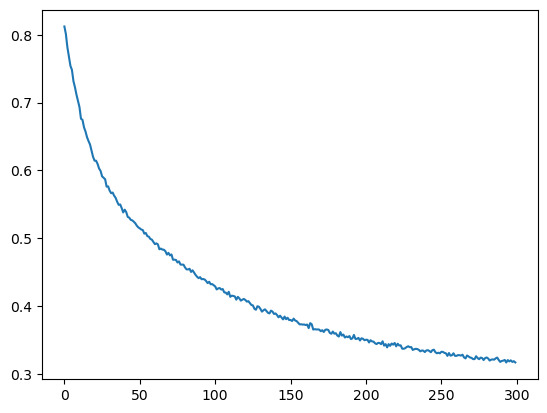

In [61]:
plt.plot(range(epochs), losses)




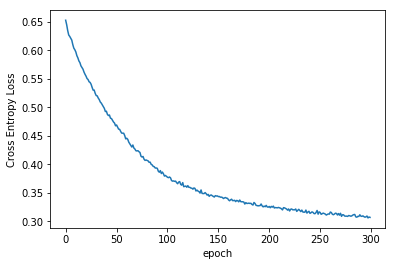

In [18]:
# DON'T WRITE HERE

### 14. Evaluate the test set
With torch set to <tt>no_grad</tt>, pass <tt>cat_test</tt> and <tt>con_test</tt> through the trained model. Create a validation set called "y_val". Compare the output to <tt>y_test</tt> using the loss function defined above. Results may vary.

In [63]:
with torch.no_grad():
    y_val = model(cat_test, cont_test)
    loss = criterion(y_val, y_test)



# RUN THIS CODE TO COMPARE RESULTS
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.32074592


In [19]:
# TO EVALUATE THE TEST SET

CE Loss: 0.30774996


### 15. Calculate the overall percent accuracy
Using a for loop, compare the argmax values of the <tt>y_val</tt> validation set to the <tt>y_test</tt> set.

In [64]:
rows = len(y_test)
correct = 0
for i in range(rows):
    if y_val[i].argmax().item() == y_test[i]:
        correct += 1

pct_corr = 100*correct/rows
print(pct_corr)






85.4


In [20]:
# DON'T WRITE HERE


4255 out of 5000 = 85.10% correct


### BONUS: Feed new data through the trained model
See if you can write a function that allows a user to input their own values, and generates a prediction.<br>
<strong>HINT</strong>:<br>There's no need to build a DataFrame. You can use inputs to populate column variables, convert them to embeddings with a context dictionary, and pass the embedded values directly into the tensor constructors:<br>
<pre>mar = input("What is the person's marital status? ")
mar_d = dict(Divorced=0, Married=1, Married-spouse-absent=2, Never-married=3, Separated=4, Widowed=5)
mar = mar_d[mar]
cats = torch.tensor([..., ..., mar, ..., ...], dtype=torch.int64).reshape(1,-1)</pre>
Make sure that names are put in alphabetical order before assigning numbers.

Also, be sure to run <tt>model.eval()</tt> before passing new date through. Good luck!

In [ ]:
# WRITE YOUR CODE HERE:


In [65]:
def test_data(mdl): # pass in the name of the model
    # INPUT NEW DATA
    age = float(input("What is the person's age? (18-90)  "))
    sex = input("What is the person's sex? (Male/Female) ").capitalize()
    edn = int(input("What is the person's education level? (3-16) "))
    mar = input("What is the person's marital status? ").capitalize()
    wrk = input("What is the person's workclass? ").capitalize()
    occ = input("What is the person's occupation? ").capitalize()
    hrs = float(input("How many hours/week are worked? (20-90)  "))

    # PREPROCESS THE DATA
    sex_d = {'Female':0, 'Male':1}
    mar_d = {'Divorced':0, 'Married':1, 'Married-spouse-absent':2, 'Never-married':3, 'Separated':4, 'Widowed':5}
    wrk_d = {'Federal-gov':0, 'Local-gov':1, 'Private':2, 'Self-emp':3, 'State-gov':4}
    occ_d = {'Adm-clerical':0, 'Craft-repair':1, 'Exec-managerial':2, 'Farming-fishing':3, 'Handlers-cleaners':4,
            'Machine-op-inspct':5, 'Other-service':6, 'Prof-specialty':7, 'Protective-serv':8, 'Sales':9, 
            'Tech-support':10, 'Transport-moving':11}

    sex = sex_d[sex]
    mar = mar_d[mar]
    wrk = wrk_d[wrk]
    occ = occ_d[occ]

    # CREATE CAT AND CONT TENSORS
    cats = torch.tensor([sex,edn,mar,wrk,occ], dtype=torch.int64).reshape(1,-1)
    conts = torch.tensor([age,hrs], dtype=torch.float).reshape(1,-1)
    
    # SET MODEL TO EVAL (in case this hasn't been done)
    mdl.eval()

    # PASS NEW DATA THROUGH THE MODEL WITHOUT PERFORMING A BACKPROP
    with torch.no_grad():
        z = mdl(cats, conts).argmax().item()

    print(f'\nThe predicted label is {z}')
    
test_data(model)


What is the person's age? (18-90)   22
What is the person's sex? (Male/Female)  male
What is the person's education level? (3-16)  12
What is the person's marital status?  married
What is the person's workclass?  private
What is the person's occupation?  sales
How many hours/week are worked? (20-90)   40



The predicted label is 0


In [21]:
# DON'T WRITE HERE

What is the person's age? (18-90)  22
What is the person's sex? (Male/Female) male
What is the person's education level? (3-16) 12
What is the person's marital status? married
What is the person's workclass? private
What is the person's occupation? sales
How many hours/week are worked? (20-90)  40

The predicted label is 0


## Great job!